In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
diabetes = pd.read_csv('/Users/macbook/Documents/GitHub/SF_Petrov/PY_14_Очистка данных/data/diabetes_data.csv')


In [46]:
mask = diabetes.duplicated()
diabetes_duplicates = diabetes[mask]
print(f'Число найденых дубликатов: {diabetes_duplicates.shape[0]}')

Число найденых дубликатов: 10


In [47]:
diabetes = diabetes.drop_duplicates(ignore_index=True)

diabetes.shape

(768, 10)

In [49]:
low_information_cols = []
for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes[col].nunique()/ diabetes[col].count()
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных хначений')

Gender: 100.0% одинаковых значений


In [50]:
diabetes = diabetes.drop(low_information_cols, axis=1)
diabetes.shape

(768, 9)

In [65]:
#columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

def get_nan(x):
    if x == 0:
        return np.nan
    else:
        return x

diabetes['Glucose'] = diabetes['Glucose'].apply(get_nan)
diabetes['BloodPressure'] = diabetes['BloodPressure'].apply(get_nan)
diabetes['SkinThickness'] = diabetes['SkinThickness'].apply(get_nan)
diabetes['Insulin'] = diabetes['Insulin'].apply(get_nan)
diabetes['BMI'] = diabetes['BMI'].apply(get_nan)
diabetes['Insulin'].()


<class 'pandas.core.series.Series'>
RangeIndex: 768 entries, 0 to 767
Series name: Insulin
Non-Null Count  Dtype  
--------------  -----  
394 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [69]:
#mask = diabetes['Insulin'] == np.nan
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [72]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,98.0,58.0,33.0,190.0,34.0,0.430,43,0
1,2,112.0,75.0,32.0,NaN,35.7,0.148,21,0
2,2,108.0,64.0,NaN,NaN,30.8,0.158,21,0
3,8,107.0,80.0,NaN,NaN,24.6,0.856,34,0
4,7,136.0,90.0,NaN,NaN,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
763,5,139.0,64.0,35.0,140.0,28.6,0.411,26,0
764,1,96.0,122.0,NaN,NaN,22.4,0.207,27,0
765,10,101.0,86.0,37.0,NaN,45.6,1.136,38,1
766,0,141.0,NaN,NaN,NaN,42.4,0.205,29,1


In [75]:
low_information_cols = []
for col in diabetes.columns:
    top_freq = diabetes[col].value_counts(normalize=True).max()
    nunique_ratio = diabetes[col].nunique()/ diabetes[col].count()
    if top_freq > 0.4:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных хначений')

Outcome: 65.1% одинаковых значений


In [81]:
diabetes['Insulin'].isnull().value_counts()

Insulin
False    394
True     374
Name: count, dtype: int64

In [85]:
cols_null_percent = diabetes.isnull().mean()*100
cols_with_null = cols_null_percent[cols_null_percent>0].sort_values(ascending=False)
cols_with_null

Insulin          48.697917
SkinThickness    29.557292
BloodPressure     4.557292
BMI               1.432292
Glucose           0.651042
dtype: float64

In [89]:
thresh = diabetes.shape[0] * 0.7
diabetes = diabetes.dropna(thresh=thresh, axis=1)

n = diabetes.shape[1]
diabetes = diabetes.dropna(thresh=n-2, axis=0)

diabetes.shape

(761, 8)

In [90]:
values = {
    'Glucose': diabetes['Glucose'].median(),
    'BloodPressure': diabetes['BloodPressure'].median(),
    'SkinThickness': diabetes['SkinThickness'].median(),
    'BMI': diabetes['BMI'].median()
    }
diabetes = diabetes.fillna(values)

diabetes['SkinThickness'].mean()

29.109067017082786

# Метод Тьюки

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarn

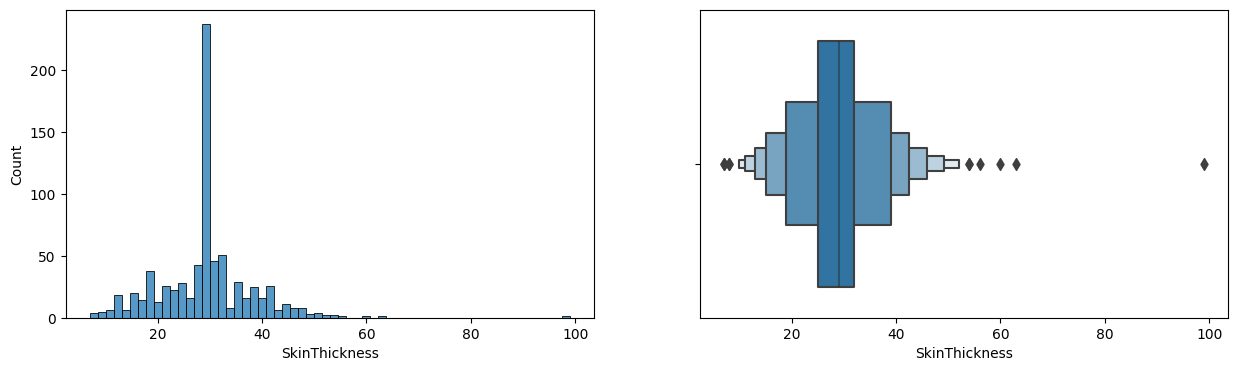

In [91]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,4))
hisplot = sns.histplot(data = diabetes, x='SkinThickness', ax=axes[0])

boxplot = sns.boxenplot(data=diabetes, x='SkinThickness', ax = axes[1])


In [92]:
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x=data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75)
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_iqr(diabetes, 'SkinThickness')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 87
Результирующее число записей: 674


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

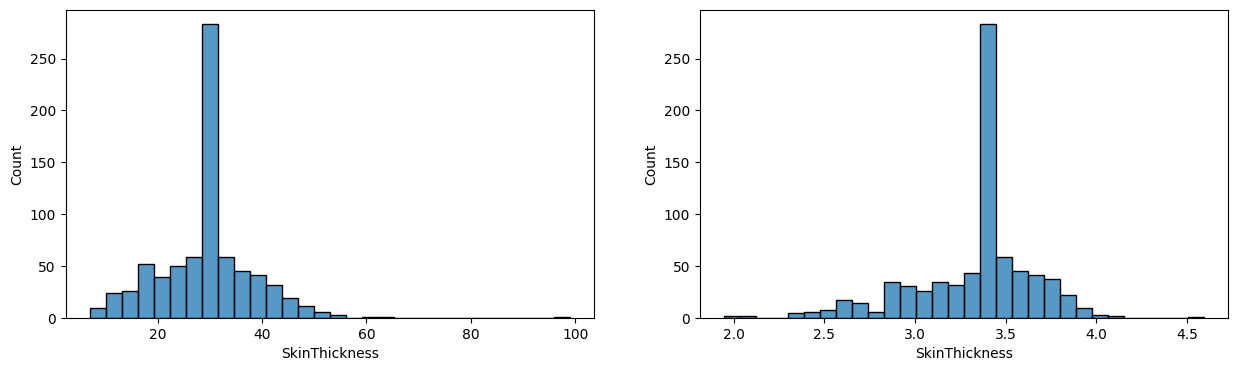

In [93]:
fig, axes = plt.subplots(1, 2, figsize=(15,4))

histplot = sns.histplot(diabetes['SkinThickness'], bins=30, ax=axes[0])

log_mkad_km = np.log(diabetes['SkinThickness'])
histplot = sns.histplot(log_mkad_km, bins=30, ax=axes[1])


In [101]:
def outliers_z_score (data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x = data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

outliers, cleaned = outliers_z_score(diabetes, 'DiabetesPedigreeFunction', log_scale=False)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу z-отклонения: 11
Результирующее число записей: 750


In [102]:
def outliers_iqr_mod(data, feature, left=1.5, right=1.5, log_scale=False):
    if log_scale:
        x = np.log(data[feature])
    else:
        x= data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned
outliers, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction')
outliers_log, _ = outliers_iqr_mod(diabetes, 'DiabetesPedigreeFunction', log_scale=True)
print(outliers.shape[0] - outliers_log.shape[0])

29


In [ ]:
ozon = pd.